In [1]:
import pandas as pd

# CSV 파일을 불러오는 예시
file_path = 'Meteorite_Landings_changed_data.csv'

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head() # 처음 5개의 행 출력


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,geometry,region
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",POINT (6.08333 50.775),Belgium
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",POINT (10.23333 56.18333),Denmark
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",POINT (-113 54.21667),Canada
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",POINT (-99.9 16.88333),Mexico
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",POINT (-64.95 -33.16667),Argentina


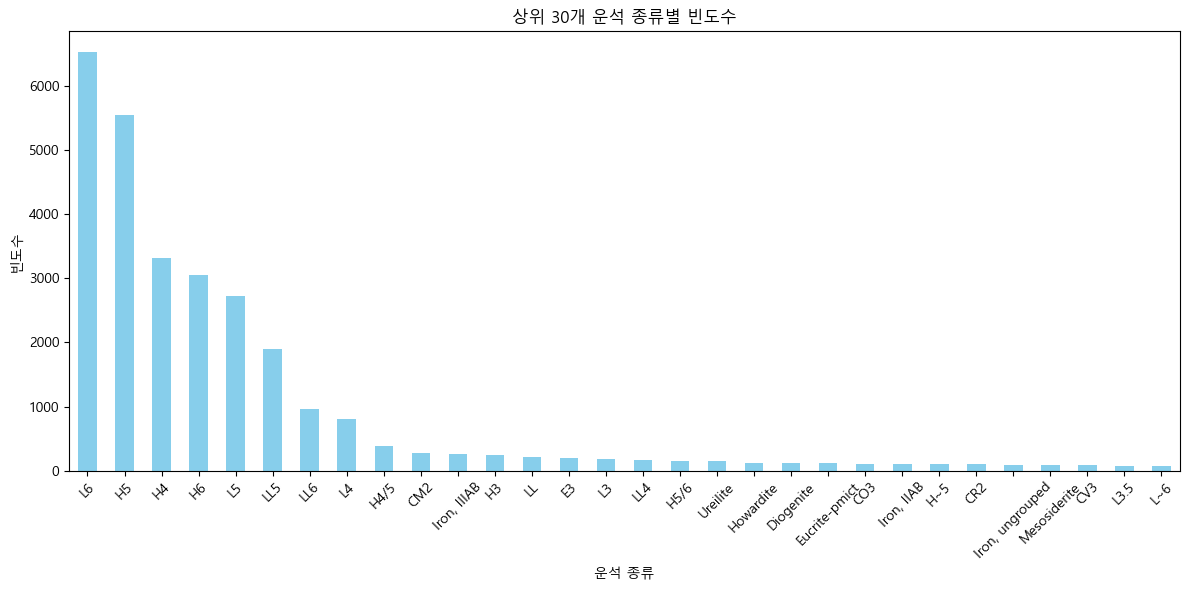

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (Windows 환경에서는 다른 폰트를 사용할 수 있음)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 운석 종류별 빈도수 계산
recclass_counts = df['recclass'].value_counts().head(30)

# 그래프 그리기
plt.figure(figsize=(12, 6))
recclass_counts.plot(kind='bar', color='skyblue')
plt.title('상위 30개 운석 종류별 빈도수')
plt.xlabel('운석 종류')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # X 축 레이블 회전
plt.tight_layout()

# 그래프 표시
plt.show()


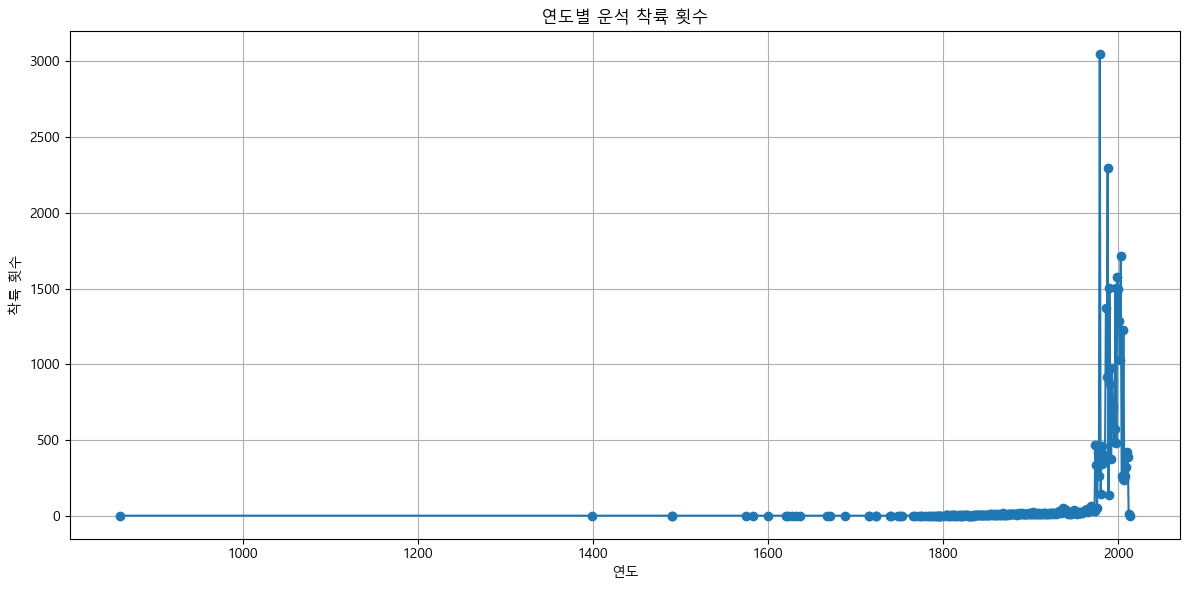

In [3]:
# 연도별 운석 착륙 횟수 계산
yearly_counts = df['year'].value_counts().sort_index()

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('연도별 운석 착륙 횟수')
plt.xlabel('연도')
plt.ylabel('착륙 횟수')
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()

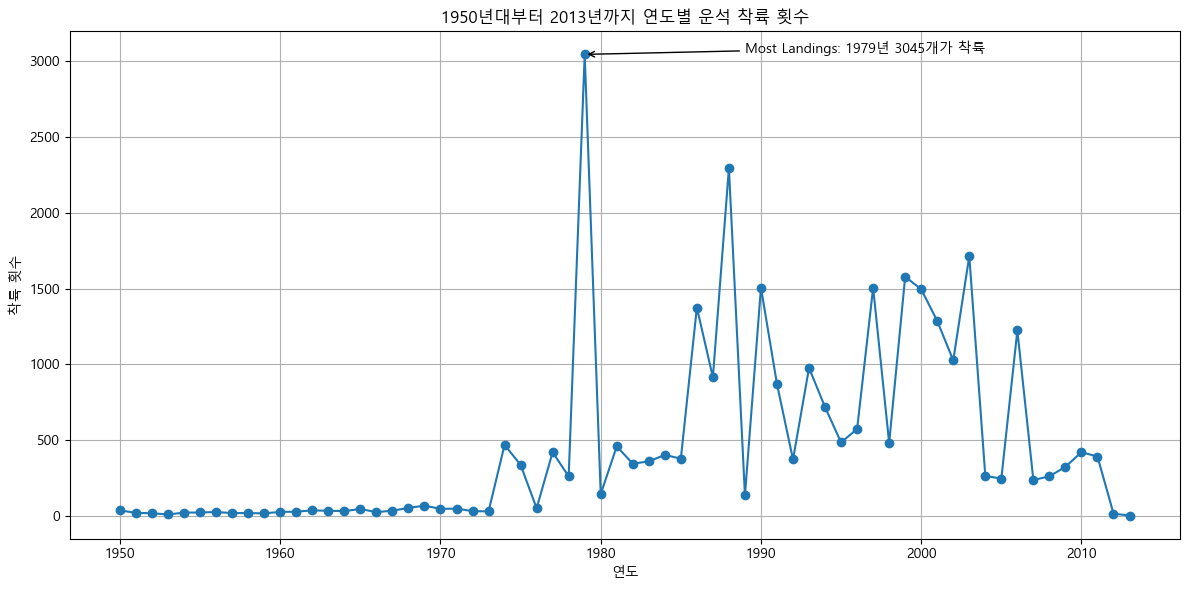

In [4]:
# 1950년대부터 2013년까지의 데이터 필터링
df_filtered = df[(df['year'] >= 1950) & (df['year'] <= 2013)]

# 연도별 운석 착륙 횟수 계산
yearly_counts = df_filtered['year'].value_counts().sort_index()

# 가장 많은 착륙이 발생한 연도 찾기
most_landings_year = yearly_counts.idxmax()
most_landings_count = yearly_counts.max()

# 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('1950년대부터 2013년까지 연도별 운석 착륙 횟수')
plt.xlabel('연도')
plt.ylabel('착륙 횟수')
plt.grid(True)
plt.tight_layout()

# 가장 많이 착륙한 년도 출력
plt.annotate(f'Most Landings: {int(most_landings_year)}년 {most_landings_count}개가 착륙', 
             xy=(most_landings_year, most_landings_count), 
             xytext=(most_landings_year + 10, most_landings_count + 10),
             arrowprops=dict(arrowstyle='->'))
plt.show()

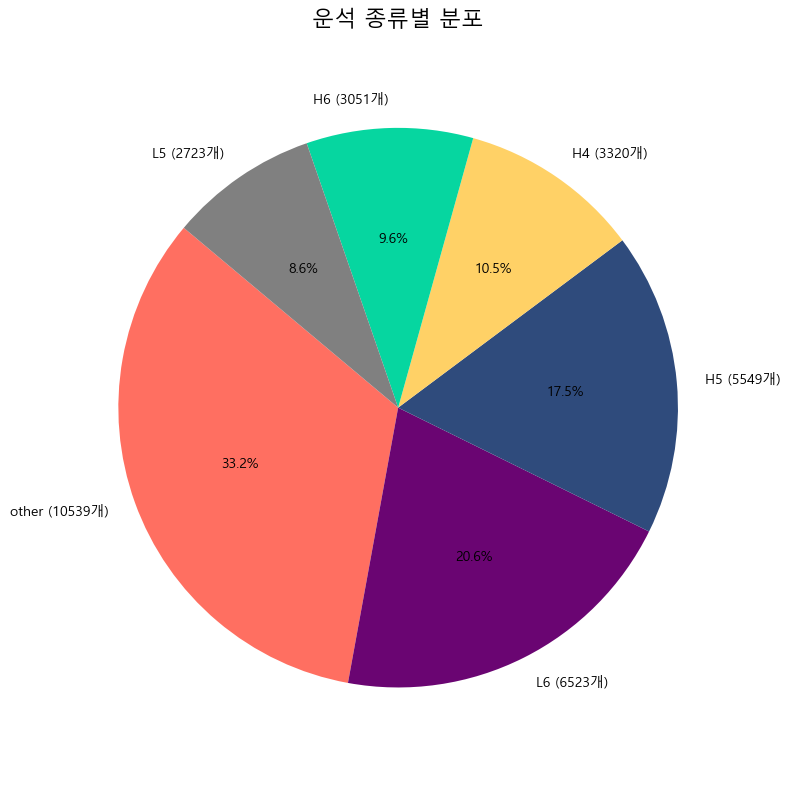

In [5]:
# 상위 5개 운석 종류 추출
top_5_classes = df['recclass'].value_counts().head(5).index

# 운석 종류가 상위 5개에 속하지 않는 경우 'other'로 대체
df['recclass_grouped'] = df['recclass'].apply(lambda x: x if x in top_5_classes else 'other')

# 'other'로 그룹화된 운석 종류별 개수 계산
class_counts = df['recclass_grouped'].value_counts()

# 운석 종류와 개수를 묶어서 표시
class_labels = [f'{class_name} ({class_counts[class_name]}개)' for class_name in class_counts.index]

# 원 그래프로 시각화
plt.figure(figsize=(8, 8))
colors = ['#FF6F61', '#6A0572', '#2F4B7C', '#FFD166', '#06D6A0', '#808080']  # 색상 설정
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('운석 종류별 분포', fontsize=16)
plt.axis('equal')  # 원형 그래프로 설정
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [6]:
# 가장 무게가 많이 나오는 운석 이름 찾기
most_common_meteorite_name = df['name'][df['mass'].idxmax()]

# 가장 많이 나오는 운석의 모든 정보 가져오기
most_common_meteorite = df[df['name'] == most_common_meteorite_name]

# 결과 출력
most_common_meteorite

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,geometry,region,recclass_grouped
14934,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",POINT (17.91667 -19.58333),Namibia,other


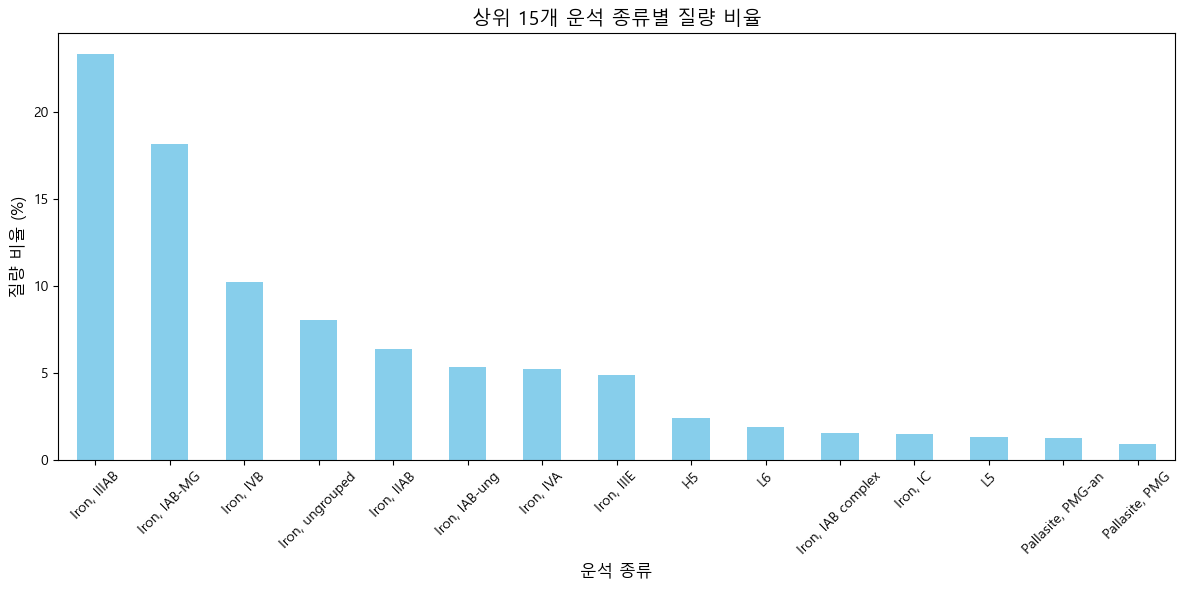

In [7]:
import matplotlib.pyplot as plt

# 각 운석 종류별 질량 합계 계산 (톤으로 변환)
df['mass_t'] = df['mass'] / 1000000  # 그램에서 톤으로 변환

# 각 운석 종류별 질량 합계 계산
mass_by_class = df.groupby('recclass')['mass_t'].sum()

# 전체 질량 계산 (톤)
total_mass_ton = df['mass_t'].sum()

# 각 운석 종류의 질량 비율 계산 (백분율로 변환)
mass_ratio_by_class_percent = (mass_by_class / total_mass_ton * 100).round(4)

# 질량 비율을 내림차순으로 정렬
mass_ratio_by_class_percent_sorted = mass_ratio_by_class_percent.sort_values(ascending=False)

# 운석 종류별 질량 비율을 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
mass_ratio_by_class_percent_sorted.head(15).plot(kind='bar', color='skyblue')
plt.title('상위 15개 운석 종류별 질량 비율', fontsize=14)
plt.xlabel('운석 종류', fontsize=12)
plt.ylabel('질량 비율 (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

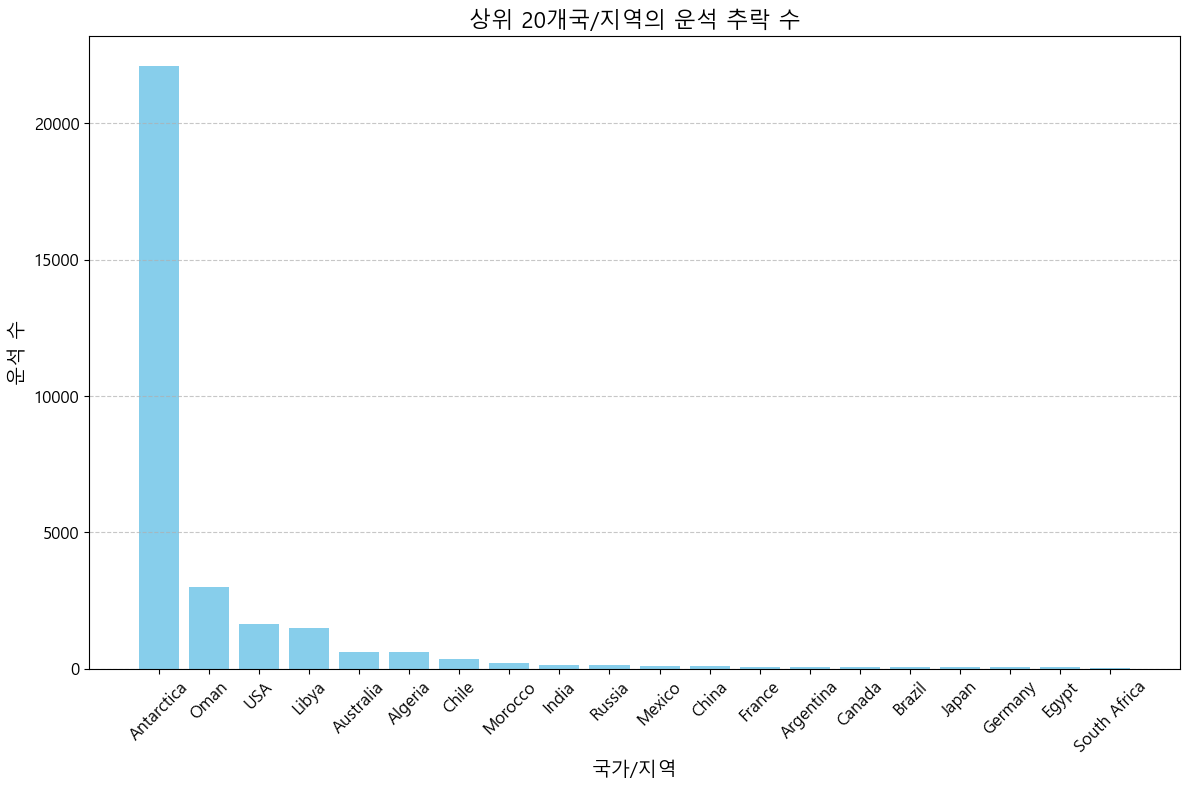

In [10]:
# 데이터프레임에서 상위 20개 국가 추출
top_20_countries = df['region'].value_counts().head(20)

# 국가 이름을 수정
top_20_countries.index = top_20_countries.index.str.replace('United States of America', 'USA')

# 시각화 설정
plt.figure(figsize=(12, 8))
plt.bar(top_20_countries.index, top_20_countries.values, color='skyblue')
plt.xlabel('국가/지역', fontsize=14)
plt.ylabel('운석 수', fontsize=14)
plt.title('상위 20개국/지역의 운석 추락 수', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 설정
plt.yticks(fontsize=12)  # y축 폰트 크기 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 추가
plt.tight_layout()

# 그래프 표시
plt.show()


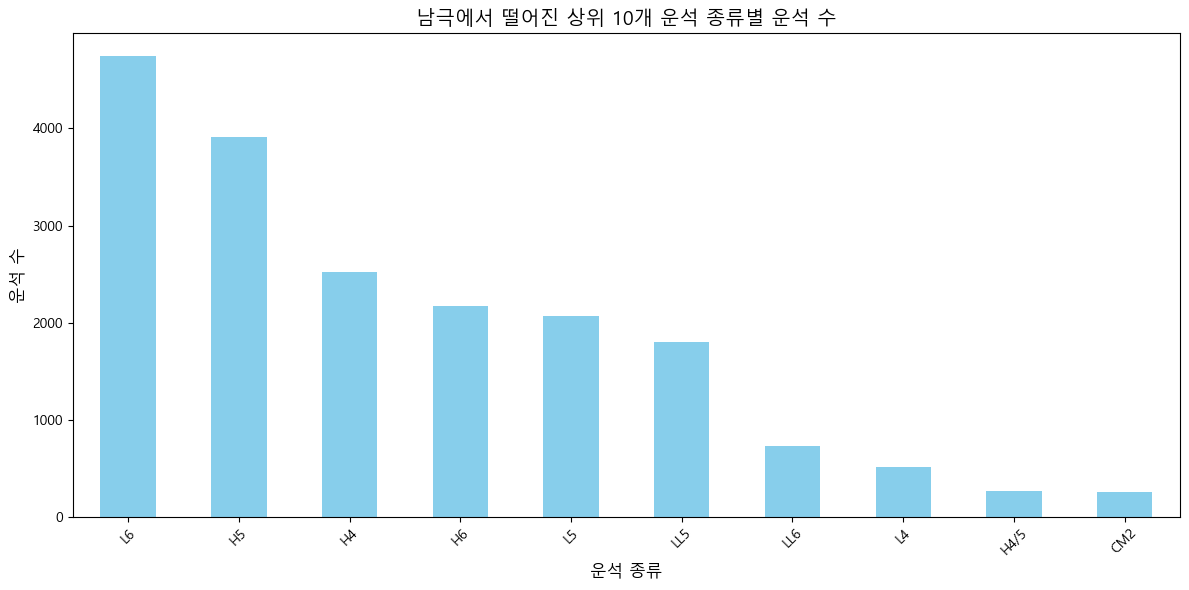

In [15]:
# 남극에서 떨어진 운석 데이터만 추출
antarctica_df = df[df['region'] == 'Antarctica']

# 각 운석 종류별 운석 수 계산
count_by_class = antarctica_df['recclass'].value_counts().head(10)

# 운석 종류별 운석 수를 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
count_by_class.plot(kind='bar', color='skyblue')
plt.title('남극에서 떨어진 상위 10개 운석 종류별 운석 수', fontsize=14)
plt.xlabel('운석 종류', fontsize=12)
plt.ylabel('운석 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

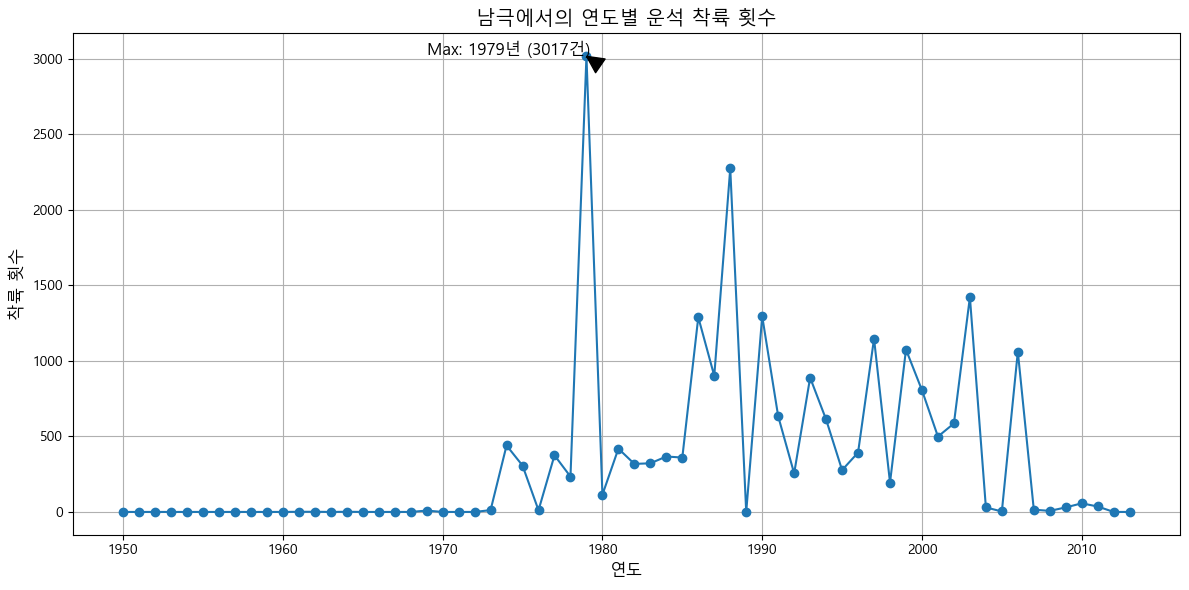

In [18]:
# 연도 범위 설정 (1950년부터 2013년까지)
years_range = range(1950, 2014)

# 남극에서 떨어진 운석 중 해당 연도별 착륙 횟수 계산
landings_by_year = [df[(df['region'] == 'Antarctica') & (df['year'] == year)].shape[0] for year in years_range]

# 가장 많이 착륙한 년도와 횟수 계산
max_landings_year = years_range[landings_by_year.index(max(landings_by_year))]
max_landings_count = max(landings_by_year)

# 연도별 착륙 횟수를 시각화합니다.
plt.figure(figsize=(12, 6))
plt.plot(years_range, landings_by_year, marker='o', linestyle='-')
plt.title('남극에서의 연도별 운석 착륙 횟수', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('착륙 횟수', fontsize=12)
plt.grid(True)

# 가장 많이 착륙한 년도와 횟수를 그래프 안에 표시
plt.annotate(f'Max: {max_landings_year}년 ({max_landings_count}건)', 
             xy=(max_landings_year, max_landings_count), 
             xytext=(max_landings_year - 10, max_landings_count + 10),
             fontsize=12, arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

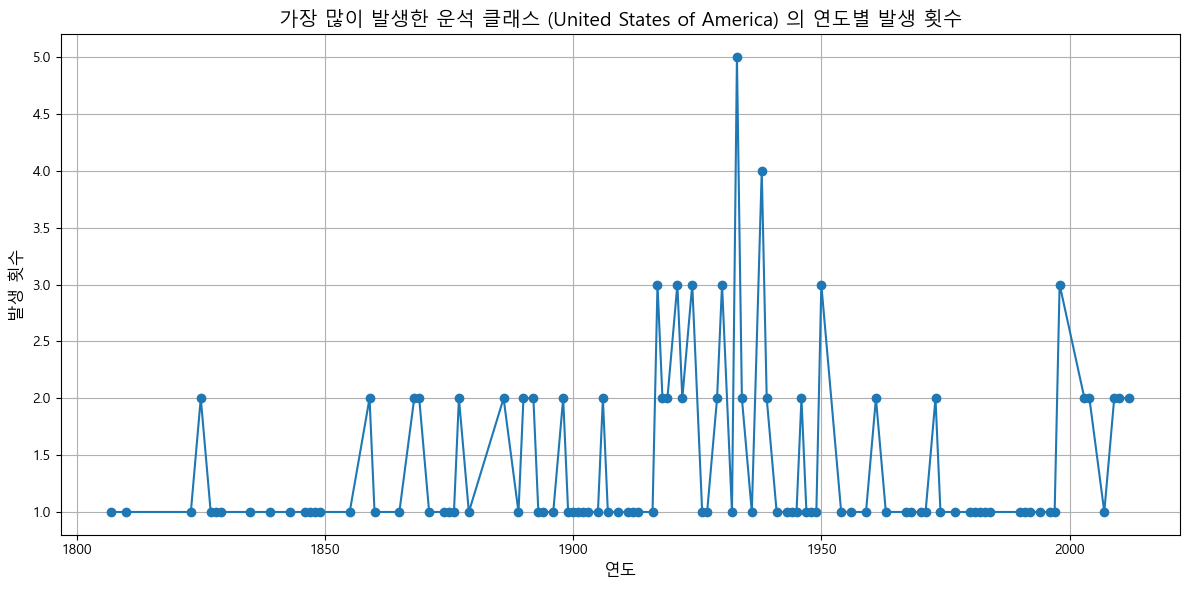

In [19]:
# Fell 클래스에 해당하는 데이터만 필터링
fell_data = df[df['fall'] == 'Fell']

# 가장 빈도가 높은 운석 클래스 찾기
most_common_class = fell_data['region'].value_counts().idxmax()

# 가장 빈도가 높은 운석 클래스에 해당하는 데이터 추출
most_common_class_data = fell_data[fell_data['region'] == most_common_class]

# 가장 빈도가 높은 운석 클래스의 연도별 발생 횟수 계산
yearly_counts = most_common_class_data['year'].value_counts().sort_index()

# 가장 빈도가 높은 운석 클래스의 연도별 발생 횟수 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title(f'가장 많이 발생한 운석 클래스 ({most_common_class}) 의 연도별 발생 횟수', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('발생 횟수', fontsize=12)
plt.grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()

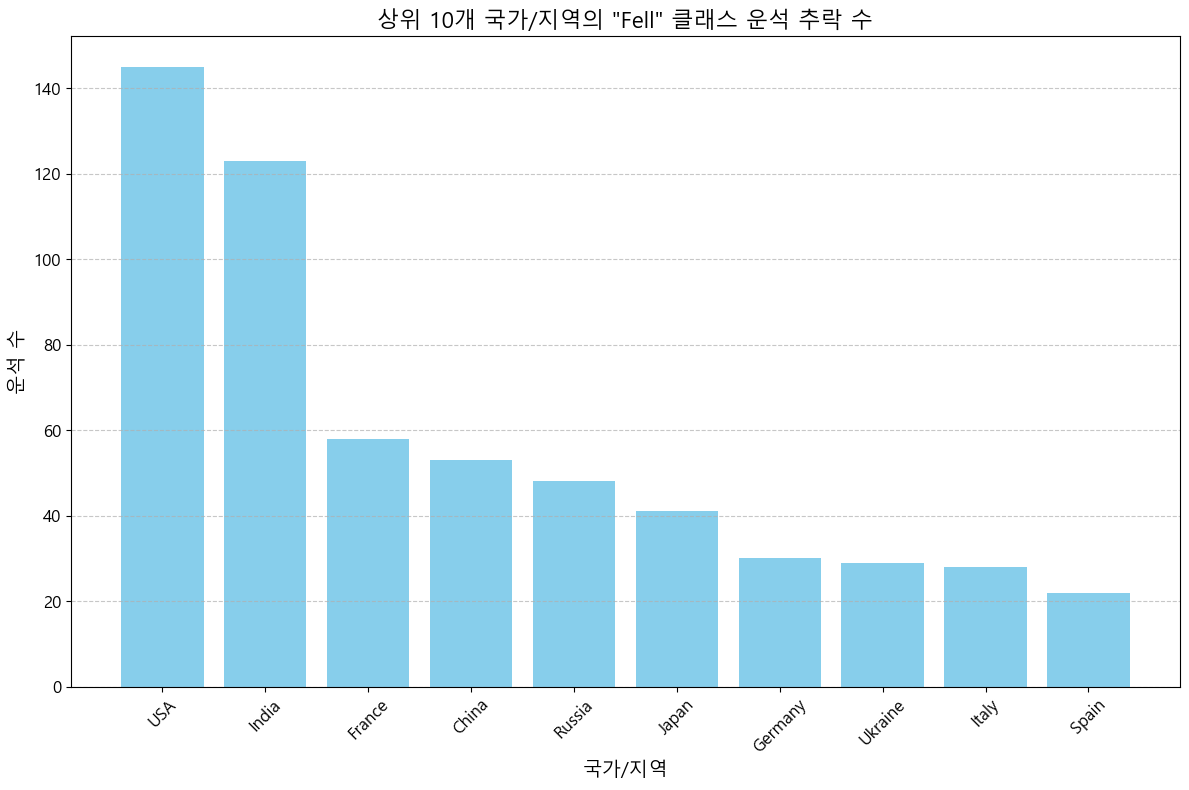

In [22]:
# "fell"인 데이터만 필터링
fell_data = df[df['fall'] == 'Fell']

# 상위 10개 국가 추출
top_10_countries = fell_data['region'].value_counts().head(10)

# 국가 이름 수정
top_10_countries.index = top_10_countries.index.str.replace('United States of America', 'USA')

# 시각화 설정
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue')
plt.xlabel('국가/지역', fontsize=14)
plt.ylabel('운석 수', fontsize=14)
plt.title('상위 10개 국가/지역의 "Fell" 클래스 운석 추락 수', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # x축 레이블 회전 및 폰트 크기 설정
plt.yticks(fontsize=12)  # y축 폰트 크기 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 추가
plt.tight_layout()

# 그래프 표시
plt.show()


In [26]:
# "Fell"인 데이터만 필터링
fell_data = df[df['fall'] == 'Fell']

# 남극에 떨어진 "Fell" 클래스 운석 수 계산
fell_in_antarctica = fell_data[fell_data['region'] == 'Antarctica'].shape[0]

print("남극에 떨어진 'Fell' 클래스 운석 수:", fell_in_antarctica)

남극에 떨어진 'Fell' 클래스 운석 수: 0


In [28]:
# "Found"인 데이터만 필터링
fell_data = df[df['fall'] == 'Found']

# 남극에 떨어진 "Found" 클래스 운석 수 계산
fell_in_antarctica = fell_data[fell_data['region'] == 'Antarctica'].shape[0]

print("남극에 떨어진 'Found' 클래스 운석 수:", fell_in_antarctica)

남극에 떨어진 'Found' 클래스 운석 수: 22097


In [30]:
# 남극에 떨어진 운석 수 계산
fell_in_antarctica = fell_data[fell_data['region'] == 'Antarctica'].shape[0]

print("남극에 떨어진 운석 수:", fell_in_antarctica)

남극에 떨어진 운석 수: 22097


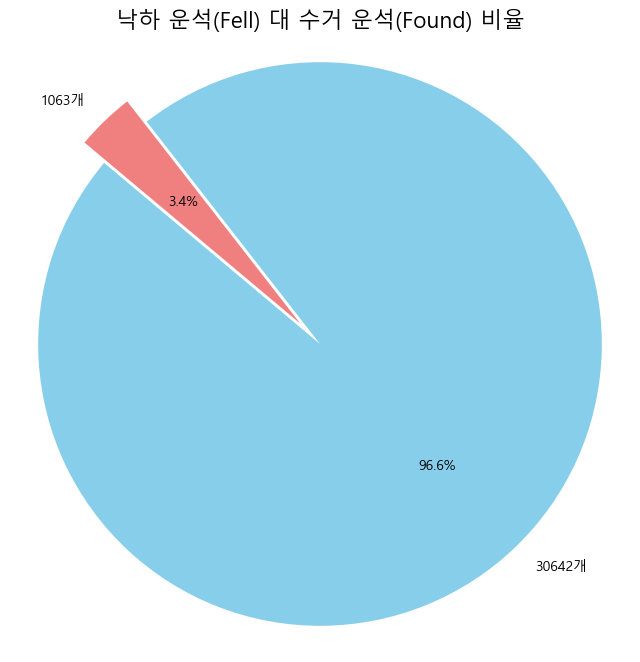

In [35]:
# 'fall' 컬럼에서 'Fell'과 'Found'의 개수를 계산
fall_counts = df['fall'].value_counts()

# 파이차트를 생성
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # 'Fell' 파이 조각을 조금 돌출
plt.pie(fall_counts, labels=[f'{count}개' for count in fall_counts], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('낙하 운석(Fell) 대 수거 운석(Found) 비율', fontsize=16)
plt.axis('equal')  # 파이차트를 원형으로 보이도록 설정

# 그래프 표시
plt.show()